(29,)
(29, 4)
The area of the images MC-02 to MC-07 and MC-24 to MC-29  is 1088071.9965822
The area of the images MC-08 to MC-23 is 1111072.2492317273


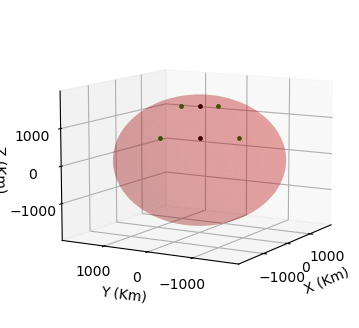

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Note that the functions for plotting the shapes relating to the images are called rectangles, when in actual fact they are closer to,
#, trapeziums but I did not realise this when i orignally named the functions. 

# Radius of the Moon in Km
r = 1738

# Number of images used
img_num = 29

# Array to contain the Lon and Lat of the top left corner of each image
long_lat_array = np.zeros([img_num,2])
# Array to contain the change in Lon and Lat going from top left to bottom right of each image 
delta_long_lat = np.zeros([img_num,2])

# Code has to be split like this as some images had different dimensions, for images 0-5 and 22-27 the change in long and lat going from,
#, top left to bottom right of image was (60,-35) whereas for images 6-21 this change was (45,-30).

# Images were taken from website that split the moon into a grid with four rows hence the four different parts of the loop 
# Rows 1 and 4 were split into 6 images hence the range of their corresponding loop being 6, rows 2 and 3 were split into 8 images hence,
#, their corresponding loops being 8 in length. 

for i in range(img_num):
    if i < 6:
        long_lat_array[i,0] = -180 + (60*i) 
        long_lat_array[i,1] = 65
        
        delta_long_lat[i,0] = 60
        delta_long_lat[i,1] = -35
        
    if 6 <= i < 14:
        long_lat_array[i,0] = -180 + (45*(i-6))
        long_lat_array[i,1] = 30

        delta_long_lat[i,0] = 45
        delta_long_lat[i,1] = -30
    
    if 14 <= i < 22:
        long_lat_array[i,0] = -180 + (45*(i-14))
        long_lat_array[i,1] = 0

        delta_long_lat[i,0] = 45
        delta_long_lat[i,1] = -30
    
    if 22 <= i < 28:
        long_lat_array[i,0] = -180 + (60*(i-22))
        long_lat_array[i,1] = -30

        delta_long_lat[i,0] = 60
        delta_long_lat[i,1] = -35

# Array to contain the long and latitudes of all the corners of every image
rect_MC = np.zeros([img_num,4,2])


for i in range(29):
    rect_MC[i,0] = long_lat_array[i] 
    
    rect_MC[i,1,0] = long_lat_array[i,0] + delta_long_lat[i,0]
    rect_MC[i,1,1] = long_lat_array[i,1]

    rect_MC[i,2,0] = long_lat_array[i,0] 
    rect_MC[i,2,1] = long_lat_array[i,1] + delta_long_lat[i,1]

    rect_MC[i,3,0] = long_lat_array[i,0] + delta_long_lat[i,0]
    rect_MC[i,3,1] = long_lat_array[i,1] + delta_long_lat[i,1]


# Convert from degrees to radians to use in np functions
longitudes = np.radians(long_lat_array[:, 0])
latitudes = np.radians(long_lat_array[:, 1])

longitudes1 = np.radians(rect_MC[:,:, 0])
latitudes1 = np.radians(rect_MC[:,:, 1])



# Convert long and lat to cartesian coordinates

# Gives 3D coordinates for the location of the top left corner (TLC) for every image
x = r * np.cos(latitudes) * np.cos(longitudes)
y = r * np.cos(latitudes) * np.sin(longitudes)
z = r * np.sin(latitudes)

# Gives 3D coordinates for the location of all 4 corners for every image
x1 = r * np.cos(latitudes1) * np.cos(longitudes1)
y1 = r * np.cos(latitudes1) * np.sin(longitudes1)
z1 = r * np.sin(latitudes1)
print(x.shape)
print(x1.shape)


def Average(lst): 
    return sum(lst) / len(lst) 

rect_centres = np.zeros([img_num,3])
for i in range(img_num):
    rect_centres[i,:] = Average(x1[i]), Average(y1[i]), Average(z1[i])


Rectangle_corners = np.zeros([img_num,4,3])
for i in range(29):
    for j in range(4):
            Rectangle_corners[i,j,0] = np.round(x1[i,j],3)
            Rectangle_corners[i,j,1] = np.round(y1[i,j],3)
            Rectangle_corners[i,j,2] = np.round(z1[i,j],3)
        
#Calculating area in km squared of images MC-02 to MC-07 and MC-24 to MC-29 

midpoint_a1 = np.zeros(3)
midpoint_b1 = np.zeros(3)
# Length of base a, i.e. euclidian length of line going fromn top left corner of the rectangle (actually a trapezium) to the top right
a1 = np.linalg.norm(Rectangle_corners[0,0,:]-Rectangle_corners[0,1,:])
# Midpoint of this base a
midpoint_a1[0] = (Rectangle_corners[0,0,0]+Rectangle_corners[0,1,0])/2
midpoint_a1[1] = (Rectangle_corners[0,0,1]+Rectangle_corners[0,1,1])/2
midpoint_a1[2] = (Rectangle_corners[0,0,2]+Rectangle_corners[0,1,2])/2

# Length of base b, i.e. euclidian length of line going fromn bottom left corner of the rectangle (actually a trapezium) to the bottom right
b1 = np.linalg.norm(Rectangle_corners[0,2,:]-Rectangle_corners[0,3,:])
# Midpoint of this base b
midpoint_b1[0] = (Rectangle_corners[0,2,0]+Rectangle_corners[0,3,0])/2
midpoint_b1[1] = (Rectangle_corners[0,2,1]+Rectangle_corners[0,3,1])/2
midpoint_b1[2] = (Rectangle_corners[0,2,2]+Rectangle_corners[0,3,2])/2

# Height of trapezium
h1 = np.linalg.norm(midpoint_a1 - midpoint_b1)
Area1 = h1*(a1+b1)/2

print('The area of the images MC-02 to MC-07 and MC-24 to MC-29  is '+str(Area1))

#Calculating area in km squared of images MC-08 to MC-23

midpoint_a2 = np.zeros(3)
midpoint_b2 = np.zeros(3)
# Length of base a, i.e. euclidian length of line going fromn top left corner of the rectangle (actually a trapezium) to the top right
a2 = np.linalg.norm(Rectangle_corners[8,0,:]-Rectangle_corners[8,1,:])
# Midpoint of this base a
midpoint_a2[0] = (Rectangle_corners[8,0,0]+Rectangle_corners[8,1,0])/2
midpoint_a2[1] = (Rectangle_corners[8,0,1]+Rectangle_corners[8,1,1])/2
midpoint_a2[2] = (Rectangle_corners[8,0,2]+Rectangle_corners[8,1,2])/2

# Length of base b, i.e. euclidian length of line going fromn bottom left corner of the rectangle (actually a trapezium) to the bottom right
b2 = np.linalg.norm(Rectangle_corners[8,2,:]-Rectangle_corners[8,3,:])
# Midpoint of this base b
midpoint_b2[0] = (Rectangle_corners[8,2,0]+Rectangle_corners[8,3,0])/2
midpoint_b2[1] = (Rectangle_corners[8,2,1]+Rectangle_corners[8,3,1])/2
midpoint_b2[2] = (Rectangle_corners[8,2,2]+Rectangle_corners[8,3,2])/2

# Height of trapezium
h2 = np.linalg.norm(midpoint_a2 - midpoint_b2)
Area2 = h2*(a2+b2)/2

print('The area of the images MC-08 to MC-23 is '+str(Area2))


# Draws the ideal spherical surface of the moon
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
x_sphere = r * np.outer(np.cos(u), np.sin(v))
y_sphere = r * np.outer(np.sin(u), np.sin(v))
z_sphere = r * np.outer(np.ones(np.size(u)), np.cos(v))


# Plotting the locations of the TLC for every image onto the sphere
ticks = np.arange(-2000, 2000, 1000)
fig = plt.figure(figsize=(6,4))
axlim = 2000 #Defines the max and min values of axis to ensure moon is large in the plot
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xticks(ticks)
ax1.set_yticks(ticks)
ax1.set_zticks(ticks)
ax1.scatter(Rectangle_corners[0,0,0],Rectangle_corners[0,0,1],Rectangle_corners[0,0,2],color='green', s=6)
ax1.scatter(Rectangle_corners[0,1,0],Rectangle_corners[0,1,1],Rectangle_corners[0,1,2],color='green', s=6)
ax1.scatter(Rectangle_corners[0,2,0],Rectangle_corners[0,2,1],Rectangle_corners[0,2,2],color='green', s=6)
ax1.scatter(Rectangle_corners[0,3,0],Rectangle_corners[0,3,1],Rectangle_corners[0,3,2],color='green', s=6)
ax1.scatter(midpoint_a1[0],midpoint_a1[1],midpoint_a1[2],color='black', s=6)
ax1.scatter(midpoint_b1[0],midpoint_b1[1],midpoint_b1[2],color='black', s=6)
#ax1.scatter(rect_centres[:,0], rect_centres[:,1], rect_centres[:,2], color='black', s=6)  # Plot points
ax1.view_init(elev=10., azim=210)

ax1.plot_surface(x_sphere, y_sphere, z_sphere, color='red', alpha=0.2)

# Labeling the plot
ax1.set_xlabel('X (Km)')
ax1.set_ylabel('Y (Km)')
ax1.set_zlabel('Z (Km)')

plt.show()


In [45]:
# Install command for jupyter notebook (might be different depending on what code is being run on)
!pip install plotly


In [20]:
import plotly.graph_objects as go

# Plot points onto sphere

surface = go.Surface(x=x_sphere, y=y_sphere, z=z_sphere, opacity=0.2, colorscale=[[0, 'gray'], [1, 'gray']], showscale=False)
axlim = 2000 #Defines the max and min values of axis to ensure moon is large in the plot. 

# Manually entering all the age data calculated from crater frequency
age_data = [2.2,2.6,2.5,2.7,2.55,2.55,2.5,2.5,2.75,2.9,2.95,2.7,2.65,2.9,2.6,2.9,2.9,3.1,3.0,3.05,3.05,3.0,3.15,3.1,3.1,3.15,3.2,3.15]
avg_moon_age = Average(age_data)
print('The average age of the moon is ' +str(np.round(avg_moon_age,3)),'Ga')
# Plotting the 'rectangles' corresponding to each image. 
rectangles = [] #Empty array to hold all 29 image 'rectangles'.
for f in range(29): 
    
    # Create a 3D Mesh for each image 'rectangle'. 
    rectangle = go.Mesh3d(
        x=x1[f],
        y=y1[f],
        z=z1[f],

        color ='grey',
        opacity=0.8,
        flatshading=True
    )
    rectangles.append(rectangle) 

scatter = go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(
        size=4,
        color=age_data,  # Use point values for coloring.
        colorscale='Viridis',  # Color scale.
        colorbar=dict(title='Age (Ga)'),
        showscale=True
    )
)

scatter2 = go.Scatter3d(
    x=rect_centres[:,0], y=rect_centres[:,1], z=rect_centres[:,2],
    mode='markers',
    marker=dict(
        size=5,
        color=age_data,  # Use point values for coloring.
        colorscale='Viridis',  # Color scale.
        colorbar=dict(title='Age (Ga)'),
        showscale=True
    )
)

# Plot everything on a single interactive plot.

# First plot shows grey quadrilaterals that correspond to images, also shows a grey sphere with radius = radius of moon to show how the,
#, do not properly fit an ideal sphere, coloured points on top left corner of each quadrilateral shows the age of that subsection of the moon.
fig = go.Figure(data=[scatter, surface]+rectangles)
fig.update_layout(scene=dict(
                    xaxis=dict(nticks=4, range=[-axlim, axlim]), # Stops the axis from being crowded with numbers and becoming unclear.
                    yaxis=dict(nticks=4, range=[-axlim, axlim]),
                    zaxis=dict(nticks=4, range=[-axlim, axlim]),
                    xaxis_title='X (Km)',
                    yaxis_title='Y (Km)',
                    zaxis_title='Z (Km)'))
fig.show()

# Second plot is very similar to the first except the points have been moved fron the corner of the quadrilaterals to the centre to make it,
#, clearer which point corresponds to each surface.
fig = go.Figure(data=[scatter2, surface]+rectangles)
fig.update_layout(scene=dict(
                    xaxis=dict(nticks=4, range=[-axlim, axlim]), # Stops the axis from being crowded with numbers and becoming unclear
                    yaxis=dict(nticks=4, range=[-axlim, axlim]),
                    zaxis=dict(nticks=4, range=[-axlim, axlim]),
                    xaxis_title='X (Km)',
                    yaxis_title='Y (Km)',
                    zaxis_title='Z (Km)'))
fig.show()

# Third image is very similar to second except now the perfect grey sphere has been removed from the plot; note this disjpinted shape,
#, in the plot is not the actual shape of the moon it just a result of taking 2D images of a 3D object and then converting them back to 3D. 
fig = go.Figure(data=[scatter2]+rectangles)
fig.update_layout(scene=dict(
                    xaxis=dict(nticks=4, range=[-axlim, axlim]), # Stops the axis from being crowded with numbers and becoming unclear
                    yaxis=dict(nticks=4, range=[-axlim, axlim]),
                    zaxis=dict(nticks=4, range=[-axlim, axlim]),
                    xaxis_title='X (Km)',
                    yaxis_title='Y (Km)',
                    zaxis_title='Z (Km)'))
fig.show()


The average age of the moon is 2.836 Ga
